In [1]:
# 分类编码问题
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_train = pd.read_csv('./train.csv', index_col='id')
raw_test = pd.read_csv('./test.csv', index_col='id')

In [3]:
raw_train.shape

(600000, 24)

In [4]:
raw_train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [5]:
raw_test.shape

(400000, 23)

In [6]:
# 对数据进行分析
raw_train.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month', 'target'],
      dtype='object')

In [7]:
# 缺失值数量及其所占的比例
cols = raw_train.columns

In [8]:
count = [raw_train[col].isnull().sum() for col in cols]

In [9]:
count

[17894,
 18003,
 17930,
 18014,
 18047,
 18252,
 18156,
 18035,
 18121,
 18035,
 17778,
 18131,
 18003,
 17755,
 18073,
 18288,
 18041,
 18075,
 17916,
 17930,
 17713,
 17952,
 17988,
 0]

In [10]:
percent = [i/len(raw_train) for i in count]

In [11]:
percent

[0.029823333333333334,
 0.030005,
 0.029883333333333335,
 0.030023333333333332,
 0.030078333333333332,
 0.03042,
 0.03026,
 0.030058333333333333,
 0.03020166666666667,
 0.030058333333333333,
 0.02963,
 0.030218333333333333,
 0.030005,
 0.029591666666666665,
 0.030121666666666668,
 0.03048,
 0.030068333333333332,
 0.030125,
 0.02986,
 0.029883333333333335,
 0.02952166666666667,
 0.02992,
 0.02998,
 0.0]

In [12]:
missing = pd.DataFrame({'number':count,'proportion':percent},index=cols)

In [13]:
missing

,number,proportion
bin_0,17894,0.029823
bin_1,18003,0.030005
bin_2,17930,0.029883
bin_3,18014,0.030023
bin_4,18047,0.030078
nom_0,18252,0.030420
nom_1,18156,0.030260
nom_2,18035,0.030058
nom_3,18121,0.030202
nom_4,18035,0.030058


In [14]:
import seaborn as sns
def plot_missing_values(df):

    cols = df.columns
    count = [df[col].isnull().sum() for col in cols]
    percent = [i/len(df) for i in count]
    missing = pd.DataFrame({'number':count, 'proportion': percent}, index=cols)
    
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    for i, col in enumerate(missing.columns):

        plt.subplot(1,2,i+1)
        plt.title(f'Missing values on each columns({col})')
        sns.barplot(missing[col], missing.index)
        mean = np.mean(missing[col])
        std = np.std(missing[col])
        plt.ylabel('Columns')
        plt.plot([], [], ' ', label=f'Average {col} of missing values: {mean:.2f} \u00B1 {std:.2f}')
        plt.legend()
    plt.show()
    return missing.sort_values(by='number', ascending=False)

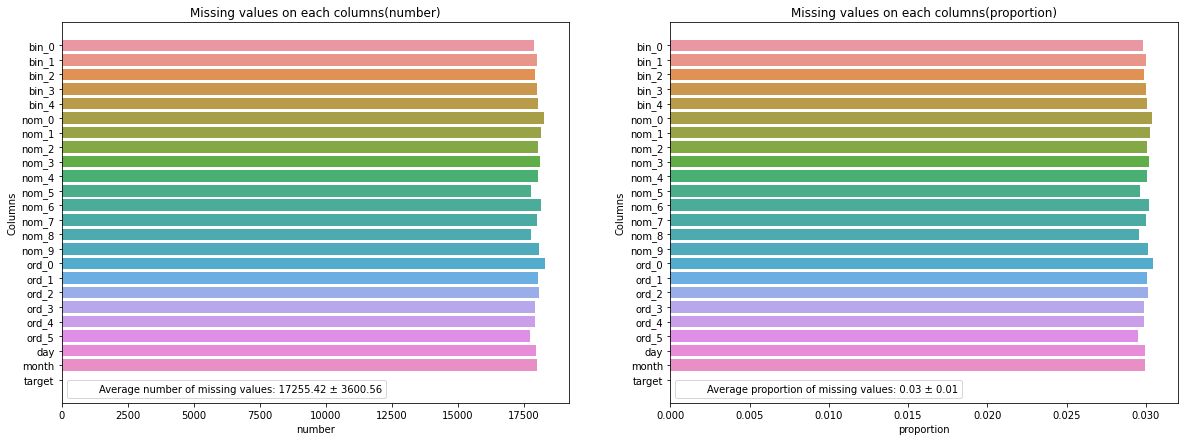

In [15]:
missing_train = plot_missing_values(raw_train)

In [16]:
missing_train.head()

,number,proportion
ord_0,18288,0.030480
nom_0,18252,0.030420
nom_1,18156,0.030260
nom_6,18131,0.030218
nom_3,18121,0.030202


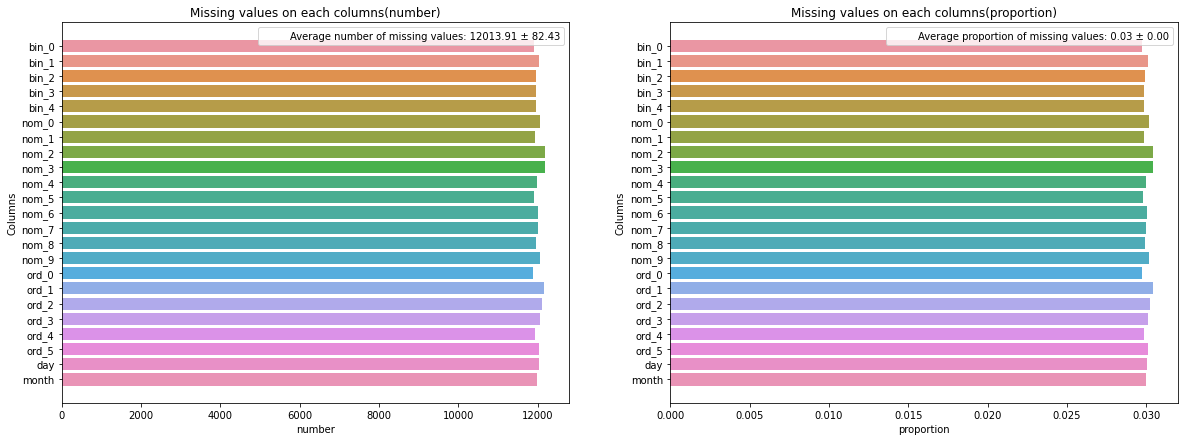

In [17]:
missing_test = plot_missing_values(raw_test)

In [18]:
missing_test.head()

,number,proportion
nom_2,12179,0.030447
nom_3,12176,0.030440
ord_1,12167,0.030418
ord_2,12105,0.030263
nom_0,12062,0.030155


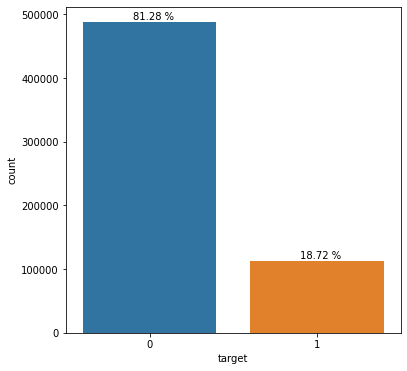

In [19]:
# 查看标签
plt.figure(figsize=(6,6))
ax = sns.countplot(raw_train.target)
height = sum([p.get_height() for p in ax.patches])
for p in ax.patches:
    ax.annotate(f'{100*p.get_height()/height:.2f} %', (p.get_x()+0.3, p.get_height()+5000),animated=True)

<AxesSubplot:>

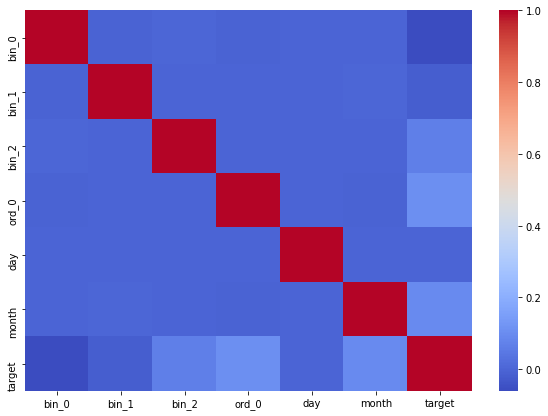

In [20]:
# 查看属性间的相关性
plt.figure(figsize=(10,7))
num_cols = raw_train.select_dtypes(exclude=['object']).columns
corr = raw_train[num_cols].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='coolwarm')

<AxesSubplot:>

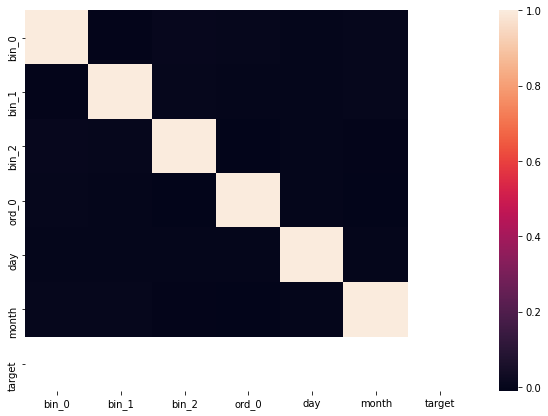

In [21]:
# 标签为0的样本特征间的相关性
plt.figure(figsize=(10,7))

corr_0 = raw_train[num_cols][raw_train.target==0].corr()
sns.heatmap(corr_0, 
            xticklabels=corr_0.columns.values,
            yticklabels=corr_0.columns.values)

<AxesSubplot:>

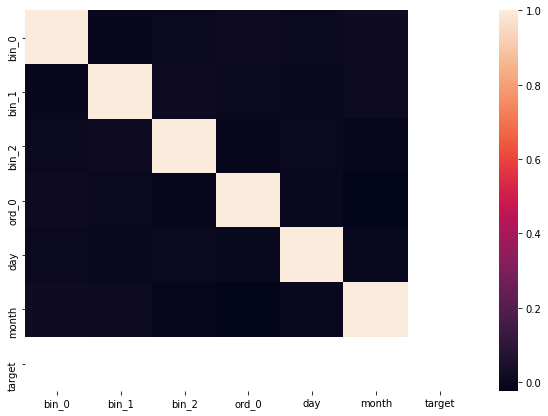

In [22]:
# 标签为1的样本特征间的相关性
plt.figure(figsize=(10,7))

corr_1 = raw_train[num_cols][raw_train.target==1].corr()
sns.heatmap(corr_1, 
            xticklabels=corr_1.columns.values,
            yticklabels=corr_1.columns.values)

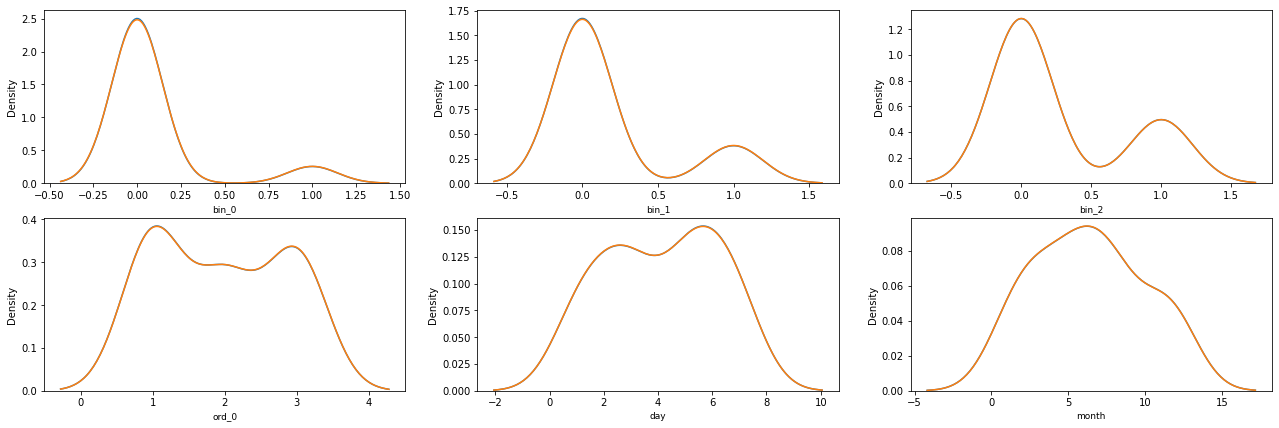

In [23]:
# 密度分布图
num_cols = raw_test.select_dtypes(exclude=['object']).columns
fig, ax = plt.subplots(2,3,figsize=(22,7))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    plt.xlabel(col,fontsize=9)
    sns.kdeplot(raw_train[col].values,bw=0.5,label='Train')
    sns.kdeplot(raw_test[col].values,bw=0.5,label='Test')
plt.show()

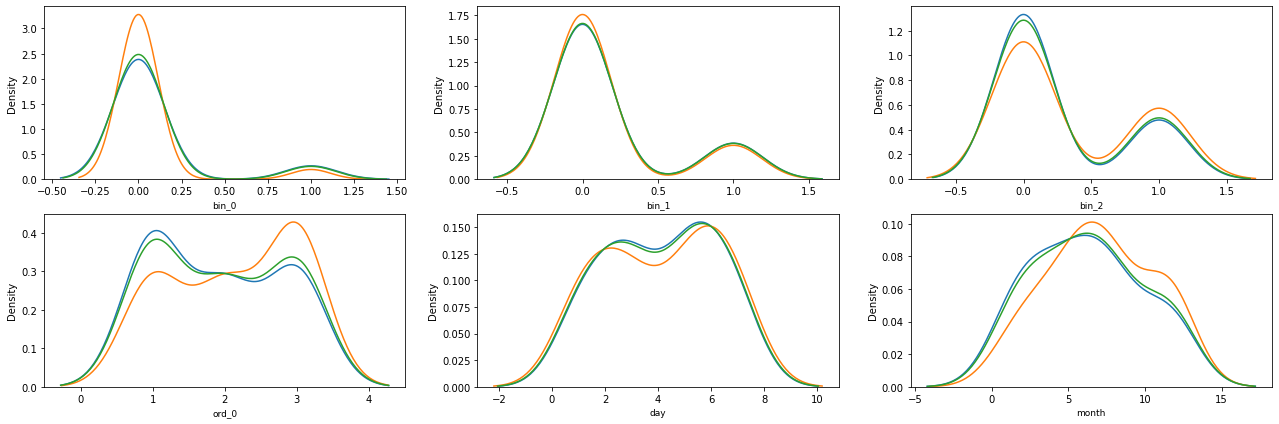

In [24]:
target0 = raw_train.loc[raw_train['target'] == 0]
target1 = raw_train.loc[raw_train['target'] == 1]

fig, ax = plt.subplots(2,3,figsize=(22,7))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    plt.xlabel(col, fontsize=9)
    sns.kdeplot(target0[col].values, bw=0.5,label='Target: 0')
    sns.kdeplot(target1[col].values, bw=0.5,label='Target: 1')
    sns.kdeplot(raw_test[col].values, bw=0.5,label='Test')
    
plt.show() 

Text(0.5, 0.98, 'Distribution over binary feature of train data')

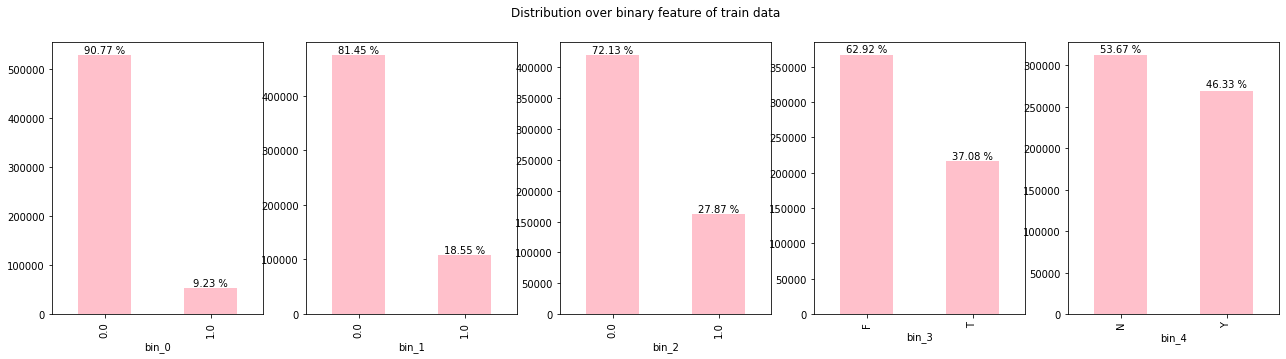

In [25]:
# 二分类数据
# 训练集
bin_cols = [f'bin_{i}' for i in range(5)]

fig, ax = plt.subplots(1,5, figsize=(22, 5))

for i, col in enumerate(bin_cols):
     ax0 = plt.subplot(1,5,i+1)
     raw_train[col].value_counts().plot.bar(color='pink')
     height = sum([p.get_height() for p in ax0.patches])

     for p in ax0.patches:
         ax0.text(p.get_x()+p.get_width()/2., p.get_height()+4000, f'{100*p.get_height()/height:.2f} %', ha='center')
     plt.xlabel(f'{col}')
plt.suptitle('Distribution over binary feature of train data')

Text(0.5, 0.98, 'Distribution over binary feature of test data')

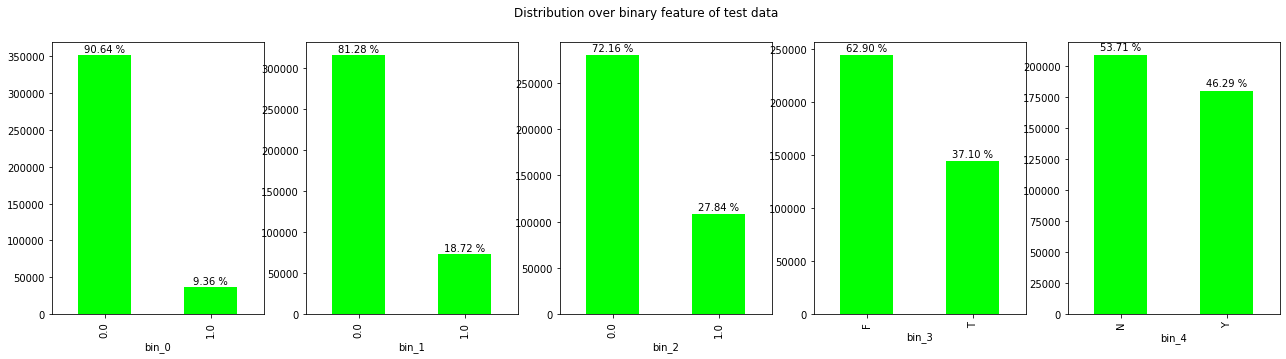

In [28]:
# 测试集
fig, ax = plt.subplots(1,5, figsize=(22, 5))

for i, col in enumerate(bin_cols):
     ax0 = plt.subplot(1,5,i+1)
     raw_test[col].value_counts().plot.bar(color='lime')
     height = sum([p.get_height() for p in ax0.patches])

     for p in ax0.patches:
         ax0.text(p.get_x()+p.get_width()/2., p.get_height()+4000, f'{100*p.get_height()/height:.2f} %', ha='center')
     plt.xlabel(f'{col}')
plt.suptitle('Distribution over binary feature of test data')

In [29]:
raw_train.day

id
0         6.0
1         7.0
2         5.0
3         3.0
4         5.0
         ... 
599995    5.0
599996    NaN
599997    7.0
599998    1.0
599999    5.0
Name: day, Length: 600000, dtype: float64

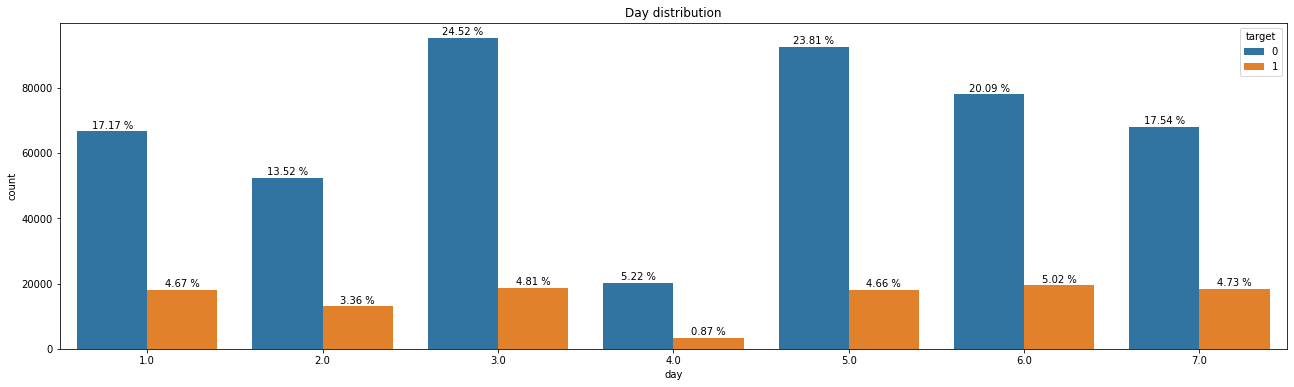

In [30]:
# 时间数据
plt.figure(figsize=(22,6))
plt.title('Day distribution')
ax = sns.countplot(raw_train.day, hue=raw_train.target)
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+1000, f'{100*p.get_height()/height:.2f} %',ha='center')
plt.show()

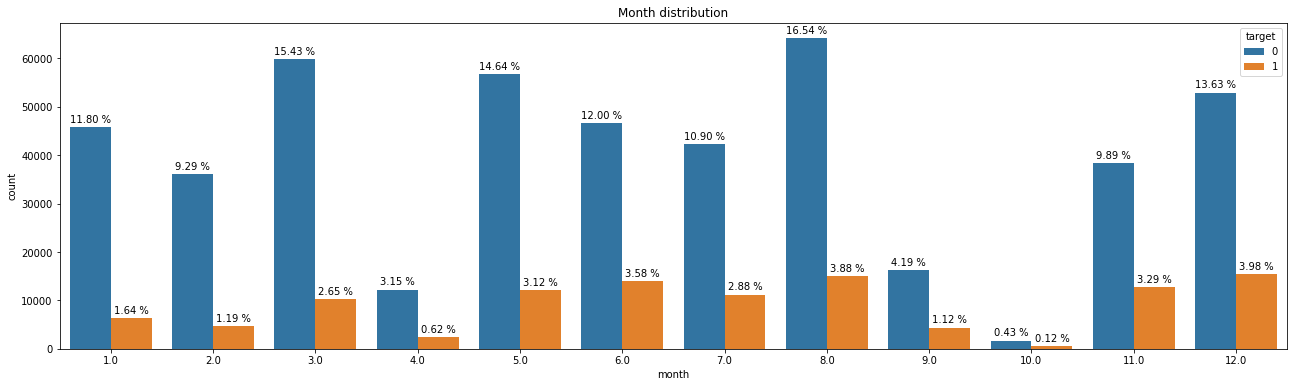

In [31]:
plt.figure(figsize=(22,6))
plt.title('Month distribution')
ax = sns.countplot(raw_train.month, hue=raw_train.target)
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+1000, f'{100*p.get_height()/height:.2f} %', ha='center')
plt.show()

In [32]:
df_train = raw_train.dropna(subset=['month', 'day'])[['day', 'month', 'target']]
df_test = raw_test.dropna(subset=['month', 'day'])[['day', 'month']]
df0 = df_train[df_train.target == 0]
df1 = df_train[df_train.target == 1]

def number2datetime(df):
    time_col = '2019/' + df.month.astype(int).astype(str) + '/' + df.day.astype(int).astype(str)
    df['time'] = pd.to_datetime(time_col , format = '%Y/%m/%d')
    df = df.drop(columns=['day', 'month'])
    return df
df0 = number2datetime(df0)
df1 = number2datetime(df1)
df_test = number2datetime(df_test)

In [35]:
count0 = df0.time.value_counts()/len(df0)
count0 = count0.sort_index()
count1 = df1.time.value_counts()/len(df1)
count1 = count1.sort_index()
count_test = df_test.time.value_counts(normalize=True)

In [39]:
count0

2019-01-01    0.013867
2019-01-02    0.010747
2019-01-03    0.019332
2019-01-04    0.003907
2019-01-05    0.018918
                ...   
2019-12-03    0.022836
2019-12-04    0.004757
2019-12-05    0.021700
2019-12-06    0.018338
2019-12-07    0.016169
Name: time, Length: 84, dtype: float64

In [40]:
count1

2019-01-01    0.009559
2019-01-02    0.007056
2019-01-03    0.009757
2019-01-04    0.001691
2019-01-05    0.009238
                ...   
2019-12-03    0.024794
2019-12-04    0.004335
2019-12-05    0.024293
2019-12-06    0.024907
2019-12-07    0.023264
Name: time, Length: 84, dtype: float64

In [41]:
count_test

2019-08-03    0.027022
2019-08-05    0.025906
2019-03-03    0.023868
2019-03-05    0.023207
2019-05-03    0.023199
                ...   
2019-10-06    0.000648
2019-10-01    0.000587
2019-10-07    0.000563
2019-10-02    0.000428
2019-10-04    0.000122
Name: time, Length: 84, dtype: float64

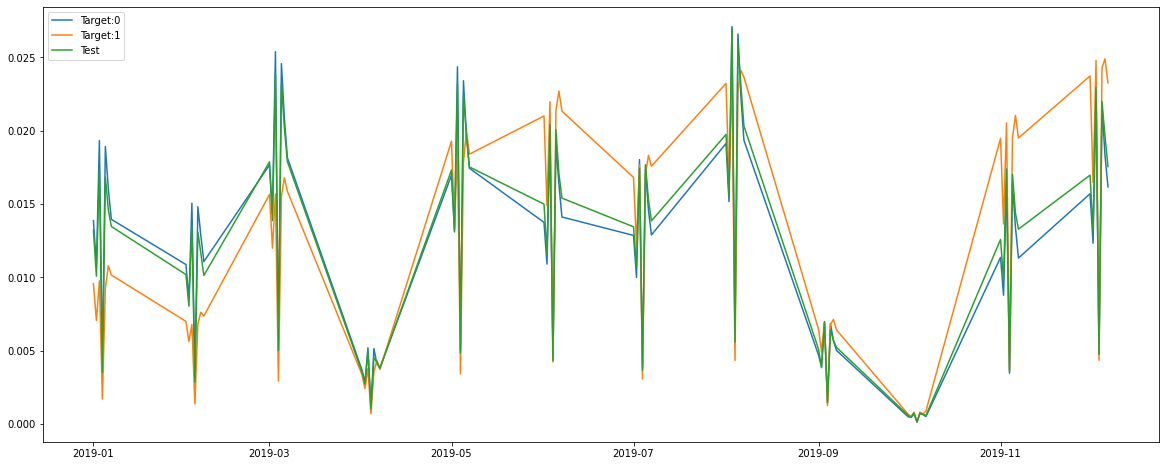

In [42]:
plt.figure(figsize=(20,8))
sns.lineplot(count0.index, count0.values, label='Target:0')
sns.lineplot(count1.index, count1.values, label='Target:1')
sns.lineplot(count_test.index, count_test.values, label='Test')
plt.legend(loc='upper left')

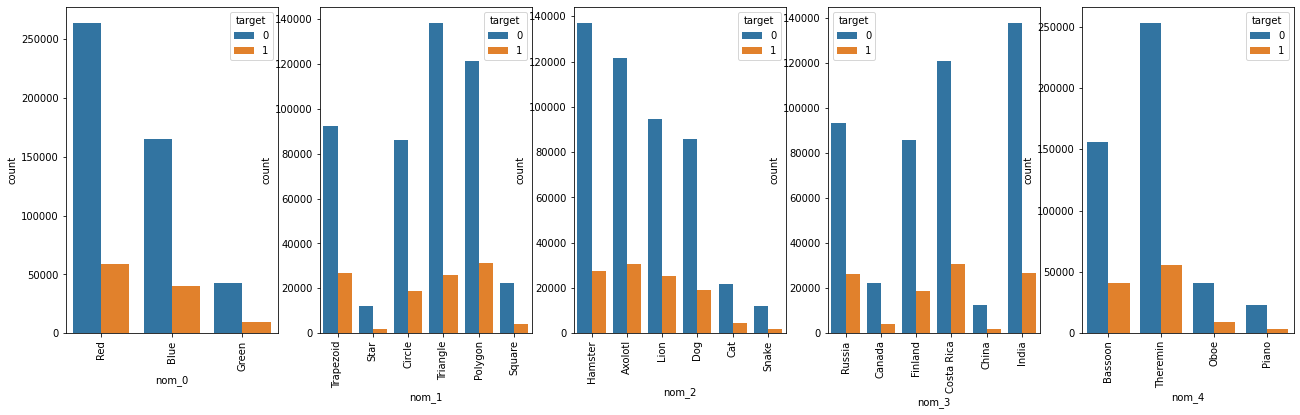

In [45]:
# 多分类数据
nom_cols = [f'nom_{i}' for i in range(5)]
fig, ax = plt.subplots(1,5, figsize=(22, 6))
for i, col in enumerate(nom_cols):
    plt.subplot(1,5,i+1)
    plt.xticks(rotation=90)
    sns.countplot(f'nom_{i}', hue='target', data= raw_train)

plt.show()

<Figure size 1224x2520 with 0 Axes>

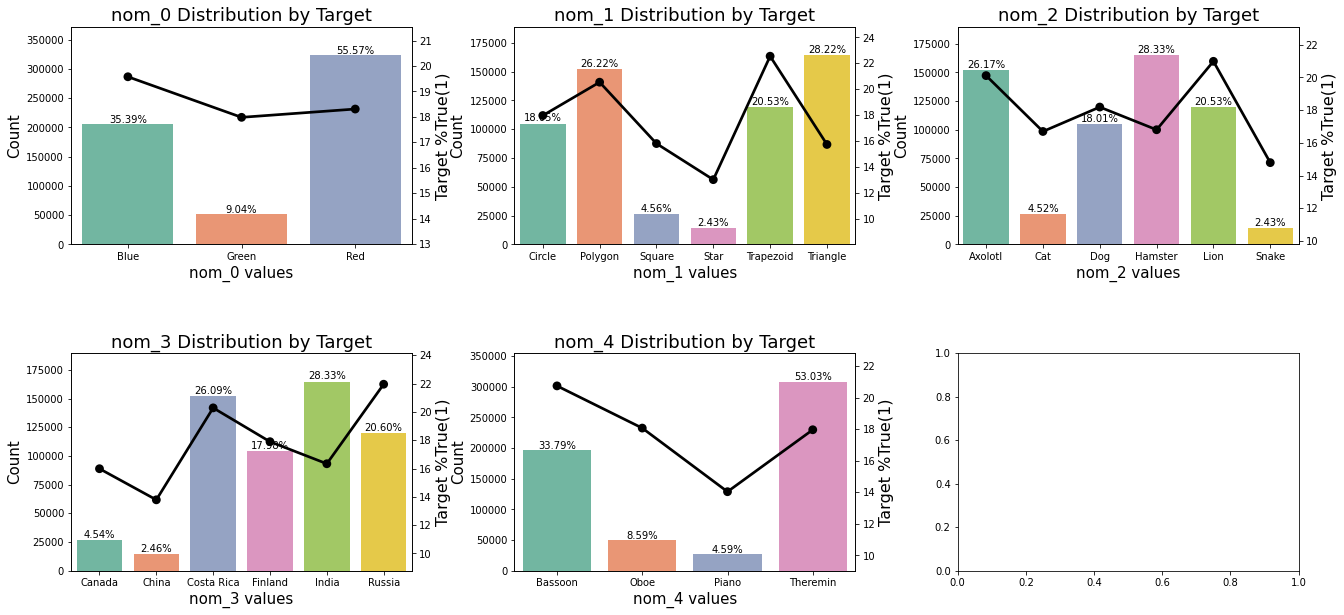

In [67]:
plt.figure(figsize=(17, 35)) 
fig, ax = plt.subplots(2,3,figsize=(22,10))

for i, col in enumerate(raw_train[nom_cols]): 
    tmp = pd.crosstab(raw_train[col], raw_train['target'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

    ax = plt.subplot(2,3,i+1)
    sns.countplot(x=col, data=raw_train, order=list(tmp[col].values) , palette='Set2') 
    ax.set_ylabel('Count', fontsize=15) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
    ax.set_xlabel(f'{col} values', fontsize=15) # x axis label

    # twinX - to build a second yaxis
    gt = ax.twinx()
    gt = sns.pointplot(x=col, y='Yes', data=tmp,
                           order=list(tmp[col].values),
                           color='black', legend=False)
    gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
    gt.set_ylabel("Target %True(1)", fontsize=16)
    sizes=[] # Get highest values in y
    total = sum([p.get_height() for p in ax.patches])
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                    height + 2000,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center") 
    ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights


plt.subplots_adjust(hspace = 0.5, wspace=.3)
plt.show()

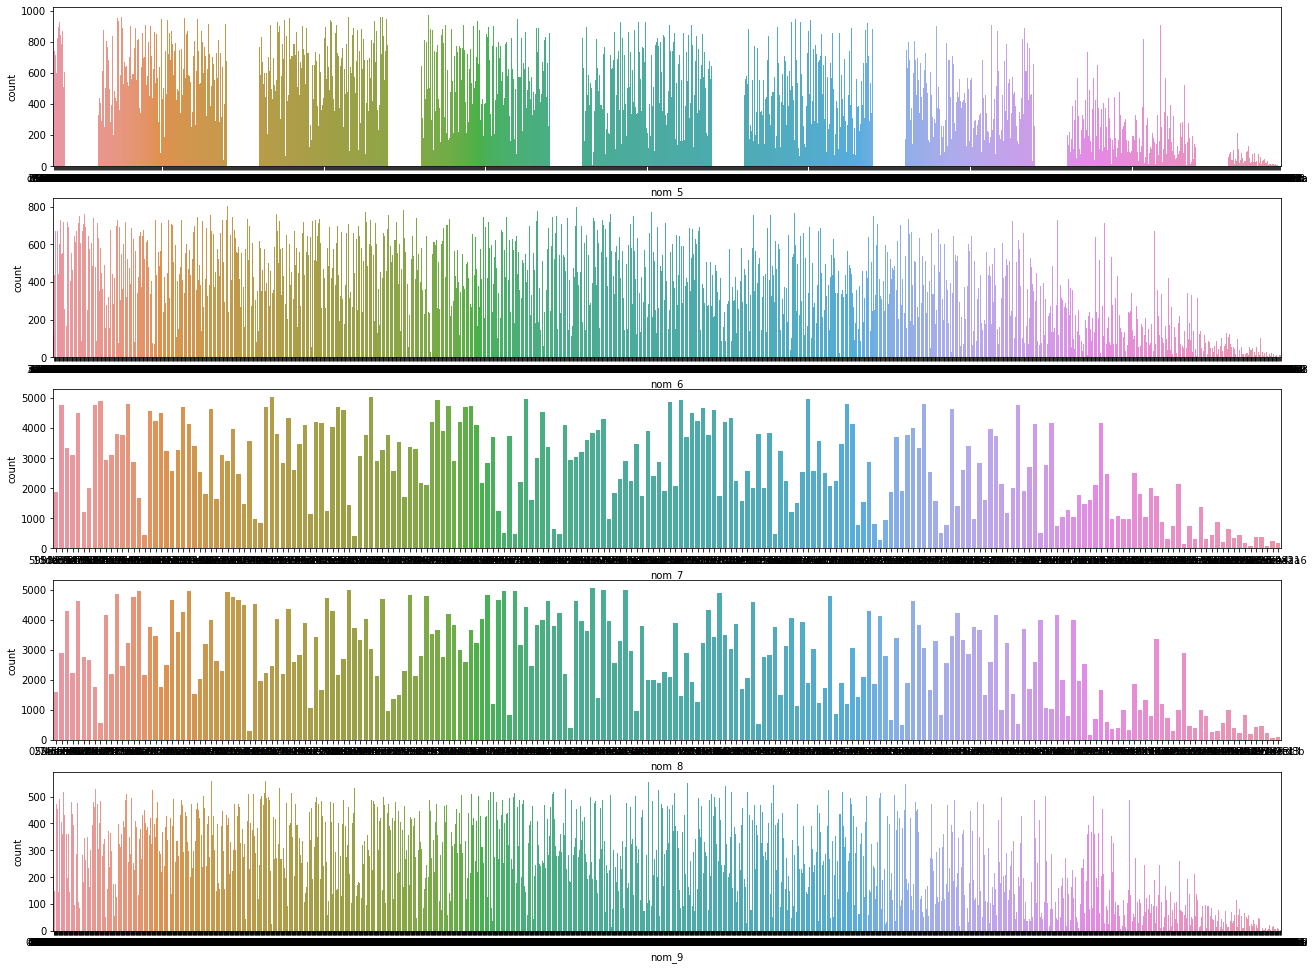

In [83]:
# 高纬度数据
nom_cols = [f'nom_{i}' for i in range(5,10)]
fig, ax = plt.subplots(5,1, figsize=(22,17))
for i,col in enumerate(nom_cols):
    plt.subplot(5,1,i+1)
    sns.countplot(raw_train[col])
plt.show()

<Figure size 1224x2520 with 0 Axes>

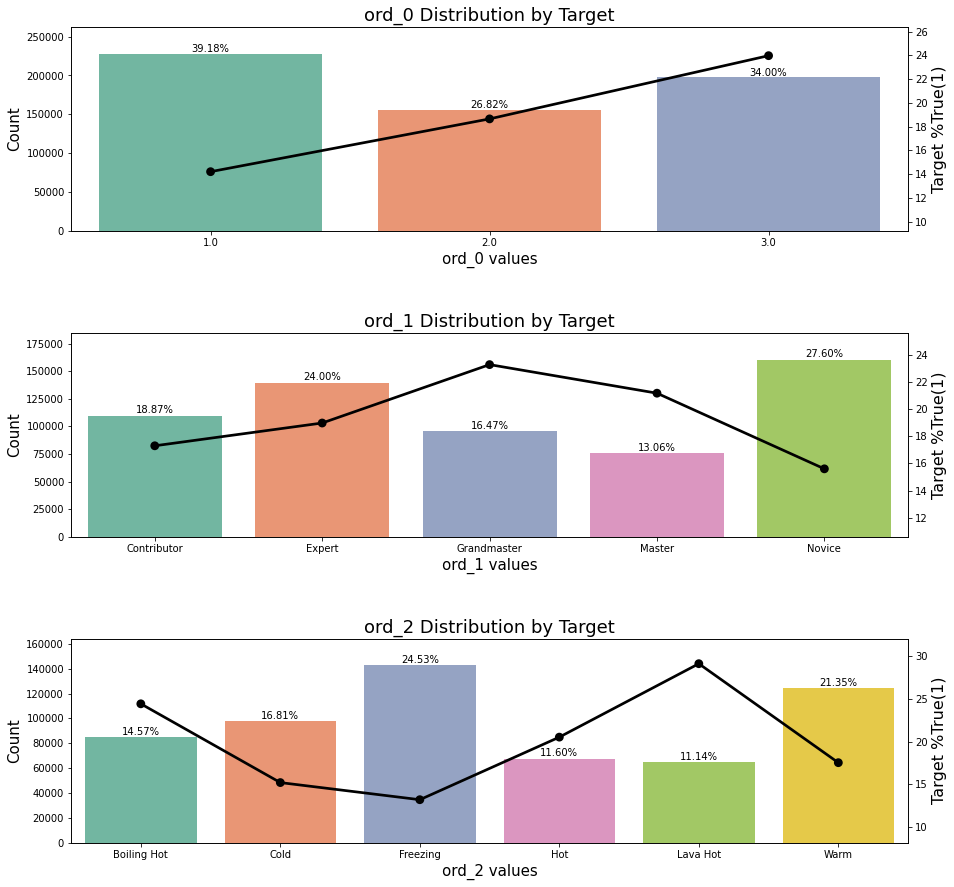

In [86]:
# 可排序的数据
ord_cols = [f'ord_{i}' for i in range(3)]
plt.figure(figsize=(17, 35)) 
fig, ax = plt.subplots(3,1,figsize=(15,15))
for i, col in enumerate(raw_train[ord_cols]): 
    tmp = pd.crosstab(raw_train[col], raw_train['target'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

    ax = plt.subplot(3,1,i+1)
    sns.countplot(x=col, data=raw_train, order=list(tmp[col].values) , palette='Set2') 
    ax.set_ylabel('Count', fontsize=15) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
    ax.set_xlabel(f'{col} values', fontsize=15) # x axis label

    gt = ax.twinx()
    gt = sns.pointplot(x=col, y='Yes', data=tmp,
                           order=list(tmp[col].values),
                           color='black', legend=False)
    gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
    gt.set_ylabel("Target %True(1)", fontsize=16)
    sizes=[] # Get highest values in y
    total = sum([p.get_height() for p in ax.patches])
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                    height + 2000,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center") 
    ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.5, wspace=.3)
plt.show()

<Figure size 1224x2520 with 0 Axes>

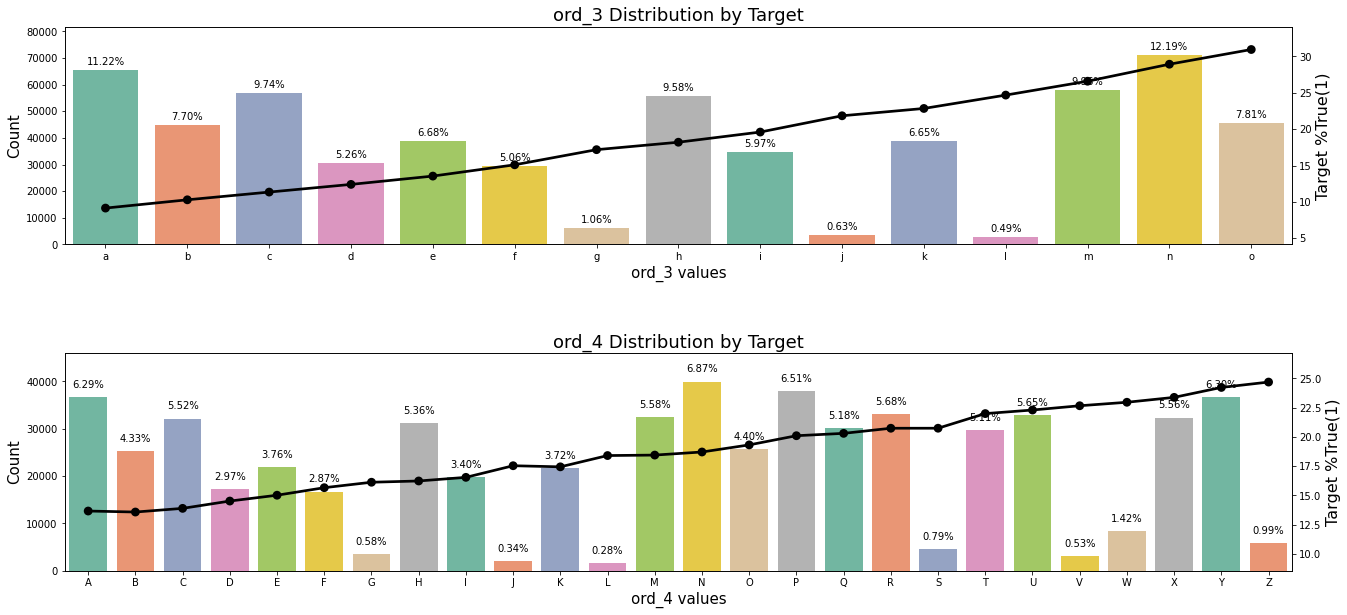

In [87]:
ord_cols = ['ord_3', 'ord_4']
plt.figure(figsize=(17, 35)) 
fig, ax = plt.subplots(2,1,figsize=(22,10))

for i, col in enumerate(raw_train[ord_cols]): 
    tmp = pd.crosstab(raw_train[col], raw_train['target'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

    ax = plt.subplot(2,1,i+1)
    sns.countplot(x=col, data=raw_train, order=list(tmp[col].values) , palette='Set2') 
    ax.set_ylabel('Count', fontsize=15) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
    ax.set_xlabel(f'{col} values', fontsize=15) # x axis label

    # twinX - to build a second yaxis
    gt = ax.twinx()
    gt = sns.pointplot(x=col, y='Yes', data=tmp,
                           order=list(tmp[col].values),
                           color='black', legend=False)
    gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
    gt.set_ylabel("Target %True(1)", fontsize=16)
    sizes=[] # Get highest values in y
    total = sum([p.get_height() for p in ax.patches])
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                    height + 2000,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center") 
    ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights


plt.subplots_adjust(hspace = 0.5, wspace=.3)
plt.show()

Text(0.5, 0, 'ord_5 values')

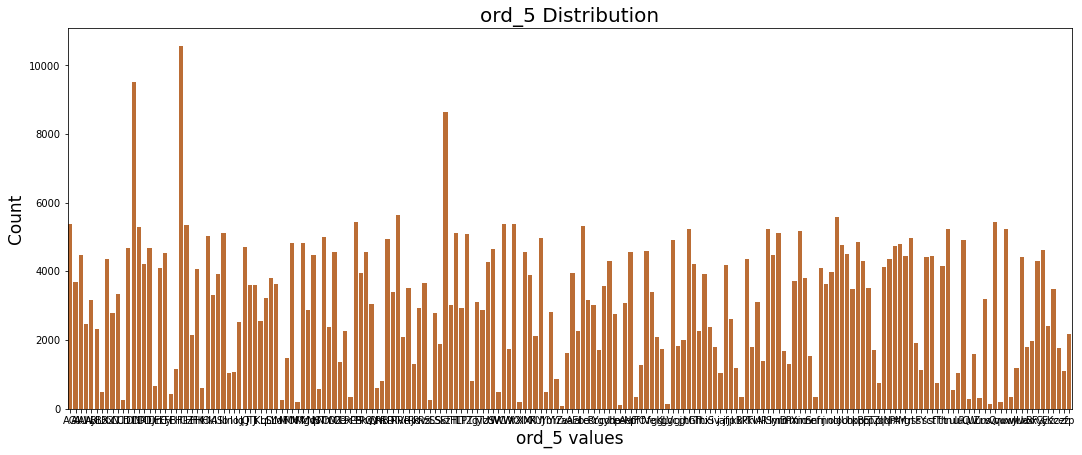

In [88]:
tmp = pd.crosstab(raw_train['ord_5'], raw_train['target'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)
plt.figure(figsize=(18,7))

plt.subplot()
ax = sns.countplot(x='ord_5', data=raw_train, order=list(tmp['ord_5'].values) , color='chocolate') 
ax.set_ylabel('Count', fontsize=17) # y axis label
ax.set_title('ord_5 Distribution', fontsize=20) # title label
ax.set_xlabel('ord_5 values', fontsize=17) # x axis label

In [89]:
# 特征工程
full_data = pd.concat([raw_train,raw_test],sort=False).drop(columns='target')

In [90]:
full_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,...,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,...,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,...,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,...,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,...,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,T,N,Red,Trapezoid,Axolotl,Costa Rica,Theremin,...,c1a4acfaf,45a68dd2e,2.0,Expert,Warm,n,R,dp,2.0,12.0
999996,0.0,0.0,0.0,F,N,Red,Polygon,Dog,Russia,Theremin,...,220190c9e,e48348d66,1.0,Contributor,NaN,n,X,US,1.0,5.0
999997,0.0,0.0,1.0,T,N,Red,Triangle,Hamster,NaN,Theremin,...,cc5495ab3,47021df0d,1.0,Grandmaster,Boiling Hot,m,P,TL,1.0,6.0


In [118]:
# 分类值
cate_columns = full_data.select_dtypes(include=['object']).columns
# 将在测试集中出现而训练集没有出现的标记为xor
for col in cate_columns:
    train_values = set(raw_train[col].unique())
    test_values = set(raw_test[col].unique())

    xor_values = test_values - train_values 
    if xor_values:
        print(f'Replace {len(xor_values)} in {col} column')
        print('They are: ', xor_values)
        print()
        full_data.loc[full_data[col].isin(xor_values), col] = 'xor'

Replace 1 in nom_6 column
They are:  {'a885aacec'}



In [131]:
# 有序值
map_ord1 = {'Novice':1, 
            'Contributor':2, 
            'Expert':4, 
            'Master':5, 
            'Grandmaster':6}
full_data.ord_1 = full_data.ord_1.map(map_ord1)

In [137]:
map_ord2 = {'Freezing':1, 
            'Cold':2, 
            'Warm':3, 
            'Hot':4, 
            'Boiling Hot':5, 
            'Lava Hot':6}
full_data.ord_2 = full_data.ord_2.map(map_ord2)

In [150]:
full_data['ord_3_by_ord'] = full_data.ord_3.map(ord, na_action='ignore') # 用ascii码来保存起来
map_ord3 = {key:value for value,key in enumerate(sorted(full_data.ord_3.dropna().unique()))}
full_data.ord_3 = full_data.ord_3.map(map_ord3)

In [151]:
full_data['ord_4_by_ord'] = full_data.ord_4.map(ord, na_action='ignore')
map_ord4 = {key:value for value,key in enumerate(sorted(full_data.ord_4.dropna().unique()))}
full_data.ord_4 = full_data.ord_4.map(map_ord4)

In [161]:
full_data['ord_5_1'] = full_data.ord_5.map(lambda string: ord(string[0]), na_action='ignore')
full_data['ord_5_2'] = full_data.ord_5.map(lambda string: ord(string[1]), na_action='ignore')

map_ord5 = {key:value for value,key in enumerate(sorted(full_data.ord_5.dropna().unique()))} 
full_data.ord_5 = full_data.ord_5.map(map_ord5)

In [163]:
# 缺失值指示器
num_columns = full_data.select_dtypes(exclude=['object']).columns.drop(['bin_0', 'bin_1', 'bin_2'])
cate_columns = full_data.columns.drop(num_columns)
missing_num_columns = [col for col in num_columns if any(full_data[col].isnull())]
for col in missing_num_columns:
    full_data[col+'_is_missing'] = full_data[col].isnull().astype(int)

In [164]:
full_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,ord_2_is_missing,ord_3_is_missing,ord_4_is_missing,ord_5_is_missing,day_is_missing,month_is_missing,ord_3_by_ord_is_missing,ord_4_by_ord_is_missing,ord_5_1_is_missing,ord_5_2_is_missing
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,...,0,0,0,0,0,0,0,0,0,0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,...,0,0,0,1,0,0,0,0,1,1
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,T,N,Red,Trapezoid,Axolotl,Costa Rica,Theremin,...,0,0,0,0,0,0,0,0,0,0
999996,0.0,0.0,0.0,F,N,Red,Polygon,Dog,Russia,Theremin,...,1,0,0,0,0,0,0,0,0,0
999997,0.0,0.0,1.0,T,N,Red,Triangle,Hamster,NaN,Theremin,...,0,0,0,0,0,0,0,0,0,0


In [167]:
# 利用三角函数对循环特征进行编码
time_cols = ['day', 'month']

for col in time_cols:
    full_data[col+'_sin'] = np.sin(2*np.pi*full_data[col]/7)
    full_data[col+'_cos'] = np.cos(2*np.pi*full_data[col]/12)
full_data = full_data.drop(columns=time_cols)

In [184]:
retain_cols = [f'ord_{i}' for i in range(6)] + ['day_sin', 'day_cos', 'month_sin', 'month_cos']
OH_cols = full_data.columns

In [182]:
OH_full = pd.get_dummies(
    full_data,
    columns=OH_cols,
    drop_first=True,
    dummy_na=True,
    sparse=True,
).sparse.to_coo() # 转换为scipy可以处理的矩阵形式

In [183]:
from sklearn.impute import SimpleImputer

In [186]:
full_data[retain_cols]

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day_sin,day_cos,month_sin,month_cos
id,,,,,,,,,,
0,3.0,2.0,4.0,2.0,20.0,56.0,-7.818315e-01,-1.000000e+00,4.338837e-01,6.123234e-17
1,3.0,6.0,3.0,4.0,23.0,150.0,-2.449294e-16,-8.660254e-01,-2.449294e-16,-8.660254e-01
2,3.0,NaN,1.0,13.0,15.0,105.0,-9.749279e-01,-8.660254e-01,9.749279e-01,-1.836970e-16
3,1.0,1.0,6.0,0.0,2.0,NaN,4.338837e-01,6.123234e-17,4.338837e-01,6.123234e-17
4,3.0,6.0,2.0,7.0,2.0,50.0,-9.749279e-01,-8.660254e-01,-9.749279e-01,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...
999995,2.0,4.0,3.0,13.0,17.0,103.0,9.749279e-01,5.000000e-01,-9.749279e-01,1.000000e+00
999996,1.0,2.0,NaN,13.0,23.0,79.0,7.818315e-01,8.660254e-01,-9.749279e-01,-8.660254e-01
999997,1.0,6.0,5.0,12.0,15.0,73.0,7.818315e-01,8.660254e-01,-7.818315e-01,-1.000000e+00


In [187]:
retain_cols

['ord_0',
 'ord_1',
 'ord_2',
 'ord_3',
 'ord_4',
 'ord_5',
 'day_sin',
 'day_cos',
 'month_sin',
 'month_cos']

In [188]:
imputer = SimpleImputer(strategy='mean')
retain_full  = pd.DataFrame(imputer.fit_transform(full_data[retain_cols]), columns=retain_cols)

In [190]:
retain_full.max()

ord_0          3.000000
ord_1          6.000000
ord_2          6.000000
ord_3         14.000000
ord_4         25.000000
ord_5        189.000000
day_sin        0.974928
day_cos        0.866025
month_sin      0.974928
month_cos      1.000000
dtype: float64

In [191]:
retain_full = retain_full/retain_full.max()

In [193]:
retain_full

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day_sin,day_cos,month_sin,month_cos
0,1.000000,0.333333,0.666667,0.142857,0.80,0.296296,-8.019377e-01,-1.154701e+00,4.450419e-01,6.123234e-17
1,1.000000,1.000000,0.500000,0.285714,0.92,0.793651,-2.512282e-16,-1.000000e+00,-2.512282e-16,-8.660254e-01
2,1.000000,0.542711,0.166667,0.928571,0.60,0.555556,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.836970e-16
3,0.333333,0.166667,1.000000,0.000000,0.08,0.481551,4.450419e-01,7.070502e-17,4.450419e-01,6.123234e-17
4,1.000000,1.000000,0.333333,0.500000,0.08,0.264550,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...
999995,0.666667,0.666667,0.500000,0.928571,0.68,0.544974,1.000000e+00,5.773503e-01,-1.000000e+00,1.000000e+00
999996,0.333333,0.333333,0.513912,0.928571,0.92,0.417989,8.019377e-01,1.000000e+00,-1.000000e+00,-8.660254e-01
999997,0.333333,1.000000,0.833333,0.857143,0.60,0.386243,8.019377e-01,1.000000e+00,-8.019377e-01,-1.000000e+00
999998,1.000000,0.166667,1.000000,0.500000,0.44,0.058201,1.000000e+00,5.773503e-01,-4.450419e-01,8.660254e-01


In [196]:
import scipy
encoded_full = scipy.sparse.hstack([OH_full, retain_full, retain_full**2]).tocsr()
encoded_train = encoded_full[:len(raw_train)]
encoded_test = encoded_full[len(raw_train):]

In [200]:
from sklearn.linear_model import LogisticRegression

In [201]:
model = LogisticRegression(C=0.03, max_iter=300)